In [ ]:
# WEEK 3 - Assignment 2.4

In [5]:
import nsfg
import pandas as pd 
import thinkstats2
import thinkplot
from os.path import basename, exists


def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + local)

download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkstats2.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkplot.py")

In [6]:
preg = nsfg.ReadFemPreg()

In [7]:
# live= preg[preg.outcome == 1] 
firsts = preg[preg.birthord == 1]
others = preg[preg.birthord != 1]
#firsts.columns 

In [8]:
first_hist = thinkstats2.Hist(firsts.totalwgt_lb, label='First')
other_hist = thinkstats2.Hist(others.totalwgt_lb, label='Other')

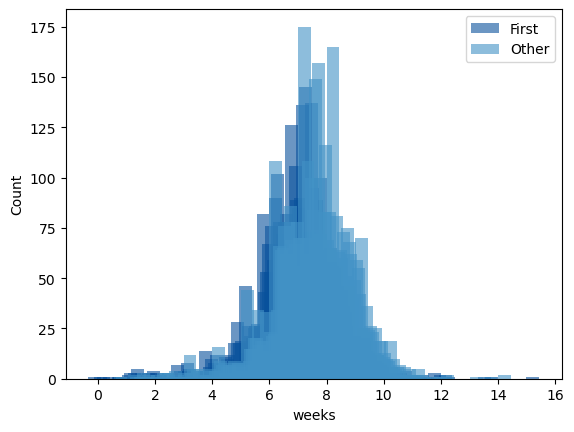

In [9]:
width = 0.45
thinkplot.PrePlot(2)
thinkplot.Hist(first_hist, align='right', width=width)
thinkplot.Hist(other_hist, align='left', width=width)
thinkplot.Config(xlabel='weeks', ylabel='Count')  
# Based on the below plot, it appears weight of the first born is lesser 
#than other babies since the other (light blue) is dominant

In [16]:
firstborn= firsts[['caseid', 'totalwgt_lb']]
otherborn = others[['caseid', 'totalwgt_lb']]

dump = pd.merge(firstborn,otherborn, on = ['caseid'])
dump 

,caseid,totalwgt_lb_x,totalwgt_lb_y
0,1,8.8125,7.8750
1,2,9.1250,7.0000
2,2,9.1250,6.1875
3,6,8.5625,9.5625
4,6,8.5625,8.3750
...,...,...,...
8215,12569,6.3750,NaN
8216,12571,6.1875,NaN
8217,12571,6.1875,NaN
8218,12571,6.1875,7.5000


In [17]:
testlist = dump.drop_duplicates()
testlist

,caseid,totalwgt_lb_x,totalwgt_lb_y
0,1,8.8125,7.8750
1,2,9.1250,7.0000
2,2,9.1250,6.1875
3,6,8.5625,9.5625
4,6,8.5625,8.3750
...,...,...,...
8212,12566,6.0000,7.0000
8213,12568,6.3750,NaN
8215,12569,6.3750,NaN
8216,12571,6.1875,NaN


In [18]:
dump.drop_duplicates('caseid')

,caseid,totalwgt_lb_x,totalwgt_lb_y
0,1,8.8125,7.8750
1,2,9.1250,7.0000
3,6,8.5625,9.5625
5,7,7.5625,6.6250
6,14,7.0000,4.0000
...,...,...,...
8211,12565,6.4375,NaN
8212,12566,6.0000,7.0000
8213,12568,6.3750,NaN
8215,12569,6.3750,NaN


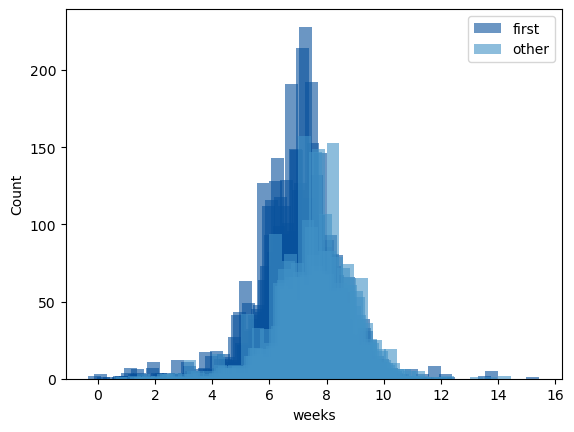

In [19]:
import thinkstats2
import thinkplot
 

first_hist = thinkstats2.Hist(testlist.totalwgt_lb_x, label='first')
other_hist = thinkstats2.Hist(testlist.totalwgt_lb_y, label='other')

width = 0.45
thinkplot.PrePlot(2)
thinkplot.Hist(first_hist, align='right', width=width)
thinkplot.Hist(other_hist, align='left', width=width)
thinkplot.Config(xlabel='weeks', ylabel='Count') 

In [20]:
# Based on the below plot, it appears weight of the first born is lesser then other babies 
# since the other (light blue) is dominant

In [21]:
testlist = dump.drop_duplicates()

testlist["val"] = testlist['totalwgt_lb_x'] > testlist['totalwgt_lb_y']
testlist.val.value_counts()

C:\Users\aarti\AppData\Local\Temp\ipykernel_19112\3139696620.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testlist["val"] = testlist['totalwgt_lb_x'] > testlist['totalwgt_lb_y']


False    4652
True     1891
Name: val, dtype: int64

In [22]:
# Based on the bool value, True says first born and heavier than the other born. 
#Count of first born with a weight over the other babies is lower (1891 < 4652) 

In [23]:
# Some additional test for duplicates
testlist.caseid.value_counts()

#635      8
#9466     8
#12477    7
#1169     7
#10442    6

test1 = testlist[testlist.caseid == 12477]
test1.drop_duplicates()

,caseid,totalwgt_lb_x,totalwgt_lb_y,val
8160,12477,7.75,6.0625,True
8161,12477,7.75,7.7500,False
8162,12477,7.75,6.7500,True
8163,12477,7.75,7.0625,True
8164,12477,7.75,8.0000,False
8166,12477,7.75,6.3750,True
8167,12477,7.75,6.1250,True
